1. Find out how many males and females participated in the test.


In [1]:
import numpy as np
import pandas as pd


In [5]:
students_data=pd.read_csv(r"C:\Users\anees\Downloads\StudentsPerformance.csv")

In [6]:
students_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [11]:
gender_count=students_data.groupby('gender').size()

In [12]:
gender_count['male']

482

In [13]:
gender_count['female']

518

2. What do you think about the students' parental level of education

In [14]:
import matplotlib.pyplot as plt



In [18]:
parental_education_count=students_data['parental level of education'].value_counts()

In [19]:
parental_education_count

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

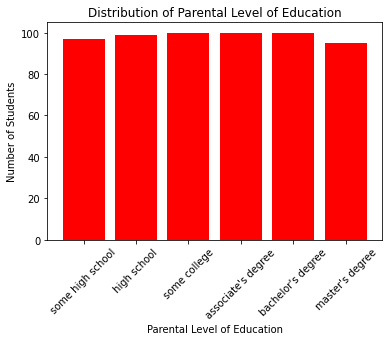

In [21]:
plt.bar(students_data['parental level of education'],students_data['math score'],color='red')
plt.title('Distribution of Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)

3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course


In [22]:
average_scores = students_data.groupby(['gender', 'test preparation course']).mean()[['math score', 'reading score', 'writing score']]

In [23]:
average_scores

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948

In [ ]:
4. What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course


In [25]:
gender_variation =students_data .groupby('gender').agg({
    'math score': ['mean', 'median', 'std'],
    'reading score': ['mean', 'median', 'std'],
    'writing score': ['mean', 'median', 'std']
})

In [26]:
gender_variation

math score                   reading score                    \
             mean median        std          mean median        std   
gender                                                                
female  63.376448   65.0  16.029928     72.590734   73.0  14.411018   
male    68.821577   69.0  14.556411     65.545643   66.0  14.149594   

       writing score                    
                mean median        std  
gender                                  
female     72.467181   74.0  14.844842  
male       63.446058   64.0  14.227225

The management needs your help to give bonus points to the top 25% of
students based on their math score, so how will you help the management
to achieve this.

In [29]:
top_25_percentile_math = np.percentile(students_data['math score'], 75)
students_data['bonus_points'] = np.where(students_data['math score'] >= top_25_percentile_math, 5, 0)
print("\nUpdated Dataset with Bonus Points:")
students_data.head()


Updated Dataset with Bonus Points:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,bonus_points
0,female,group C,some high school,free/reduced,none,0,17,10,0
1,female,group B,high school,free/reduced,none,8,24,23,0
2,female,group B,some high school,free/reduced,none,18,32,28,0
3,female,group B,some college,standard,none,11,38,32,0
4,female,group C,some college,free/reduced,none,22,39,33,0
